In [1]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model 
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np

In [2]:
### Defining Image size
IMAGE_SIZE = [224, 224]
### Loading model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
### Freezing layers
for layer in vgg.layers:  
  layer.trainable = False
### adding a 3 node final layer for predicion
x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
### Generating Summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
model.compile( loss='categorical_crossentropy',  
               optimizer='adam',  
               metrics=['accuracy'])

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,                          
                                    shear_range = 0.2,
                                   zoom_range = 0.2,
                                    horizontal_flip= True)
training_set = train_datagen.flow_from_directory('train2/train',
                                           target_size = (224, 224),
                                             batch_size = 16,                             
                                        class_mode = 'categorical')

Found 1323 images belonging to 3 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('train2/val',
                                         target_size = (224, 224),
                                         batch_size=16,
                                         class_mode = 'categorical')

Found 332 images belonging to 3 classes.


In [6]:
history = model.fit(training_set,  validation_data=test_set,  epochs=10,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/10
83/83 [==============================] - 210s 3s/step - loss: 0.4688 - accuracy: 0.8450 - val_loss: 0.4038 - val_accuracy: 0.8735
Epoch 2/10
83/83 [==============================] - 214s 3s/step - loss: 0.2723 - accuracy: 0.9055 - val_loss: 0.2995 - val_accuracy: 0.8916
Epoch 3/10
83/83 [==============================] - 217s 3s/step - loss: 0.1896 - accuracy: 0.9342 - val_loss: 0.2693 - val_accuracy: 0.9036
Epoch 4/10
83/83 [==============================] - 216s 3s/step - loss: 0.1818 - accuracy: 0.9365 - val_loss: 0.2710 - val_accuracy: 0.9157
Epoch 5/10
83/83 [==============================] - 219s 3s/step - loss: 0.1556 - accuracy: 0.9494 - val_loss: 0.2313 - val_accuracy: 0.9217
Epoch 6/10
83/83 [==============================] - 218s 3s/step - loss: 0.0875 - accuracy: 0.9690 - val_loss: 0.2379 - val_accuracy: 0.9277
Epoch 7/10
83/83 [==============================] - 217s 3s/step - loss: 0.0748 - accuracy: 0.9751 - val_loss: 0.1835 - val_accuracy: 0.9367
Epoch 8/10
83

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


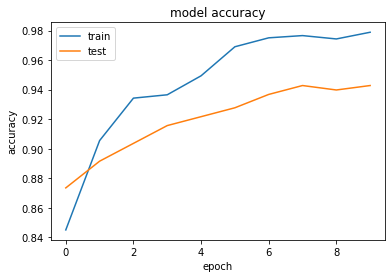

In [7]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

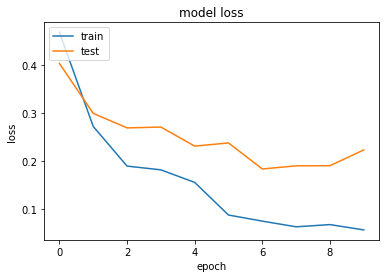

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
model.save("pineappleindex.h5")